# What is the Best Airline for Flying to LA?

In [28]:
# Name: Jianlei (John) Sun

## Data Exploration

In [29]:
# dataset: from Houston to Los Angeles in 2011

# Question:
# 1. Which airline gives the lowest the cancelled rate, delayed rate?
# 2. Which aireline gives the shortest flght time?
# 3. When is the best time to take a flight such as weekday & month?
# 4. How to predict delayed flight accurately?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df_pd = pd.read_csv('./flights.csv')
df_pd.shape

# destination is "LAX"
df_pd = df_pd.loc[df_pd['dest'] == 'LAX']
df_pd = df_pd.drop('dest', axis = 1)

In [32]:
# create date-related features
df_pd['date'] = pd.to_datetime(df_pd.date,infer_datetime_format=True)
df_pd['month'] = df_pd.date.dt.month
df_pd['weekday'] = df_pd.date.dt.weekday+1
df_pd['day'] = df_pd.date.dt.day

In [33]:
df_pd.head(2)

,date,hour,minute,dep,arr,dep_delay,arr_delay,carrier,flight,plane,cancelled,time,dist,month,weekday,day
360,2011-01-31 12:00:00,19.0,16.0,1916.0,2103.0,6.0,2.0,CO,47,N76522,0,199.0,1379,1,1,31
361,2011-01-31 12:00:00,7.0,47.0,747.0,936.0,2.0,5.0,CO,52,N67134,0,201.0,1379,1,1,31


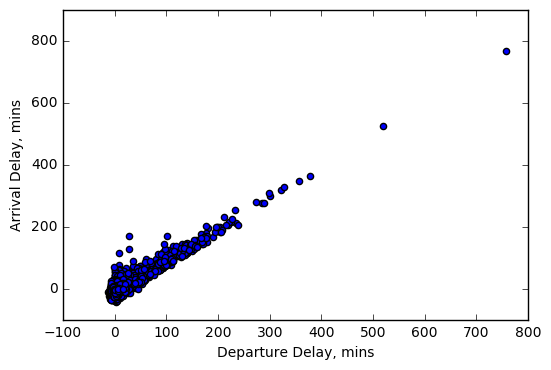

In [34]:
# plot depature vs. arrival delay time

fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1,1,1) 
t = plt.scatter(x = df_pd.dep_delay, y = df_pd.arr_delay)
ax.set_xlabel('Departure Delay, mins')
ax.set_ylabel('Arrival Delay, mins')

# Remark: we might just need either of them, e.g., "dep_deplay"

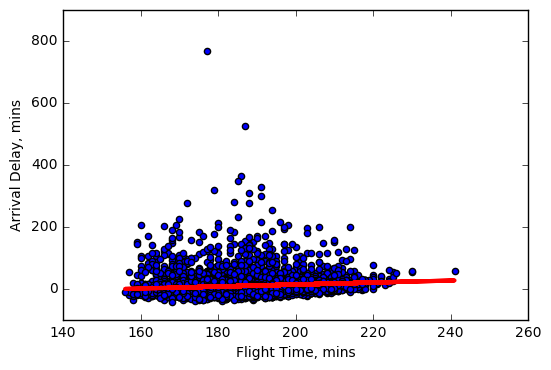

In [35]:
# plot depature delay vs. fly time

from sklearn import linear_model

fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1,1,1) 
t = plt.scatter(x = df_pd.time, y = df_pd.arr_delay)
ax.set_xlabel('Flight Time, mins')
ax.set_ylabel('Arrival Delay, mins')

# Plot linear regression line
a = df_pd.dropna()
regr = linear_model.LinearRegression()
regr.fit(a.time.values.reshape(-1,1), a.arr_delay.values.reshape(-1,1))
plt.plot(a.time.values.reshape(-1,1), regr.predict(a.time.values.reshape(-1,1)), color='red',linewidth=3)

# Remark: the longer the flight time, the larger the arrival delay.

In [36]:
# find the carrier with lowest flight time

df_pd[['time','carrier', 'dep_delay', 'arr_delay']].groupby('carrier').mean()

# Remarks: 
# the carrier "MQ" and CO show less flight time than "WN", e.g., around 10 minutes less;
# "WN": Southwest Airlines; "CO": Continental Airlines; "MQ": Envoy Air

,time,dep_delay,arr_delay
carrier,,,
CO,184.934947,12.113335,9.961749
MQ,182.000000,11.330402,4.239899
WN,192.081042,16.564435,6.095514


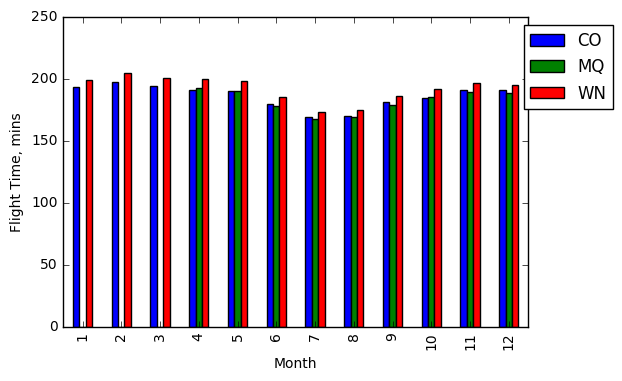

In [37]:
# plot flight time vs. month

a = df_pd[['time','carrier','month']].groupby(['month','carrier']).mean()

CO = pd.DataFrame((a.values[a.index.labels[1]==0]).reshape(1,-1)[0], columns=['CO'], index=range(1,13))
MQ_index = a.index.labels[0][a.index.labels[1]==1];
MQ = pd.DataFrame((a.values[a.index.labels[1]==1]).reshape(1,-1)[0], columns=['MQ'], index=MQ_index+1)
WN = pd.DataFrame((a.values[a.index.labels[1]==2]).reshape(1,-1)[0], columns=['WN'], index=range(1,13))
df_t = pd.concat([CO, MQ, WN], join='outer', axis=1)

fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1,1,1)
df_t.plot(kind='bar',ax=ax).legend(bbox_to_anchor=(1.2, 1))
ax.set_xlabel('Month')
ax.set_ylabel('Flight Time, mins')

# Remarks: 
# the carrier "MQ" and "CO" shows less flight time than "WN";
# July and Auguest show less flight time.

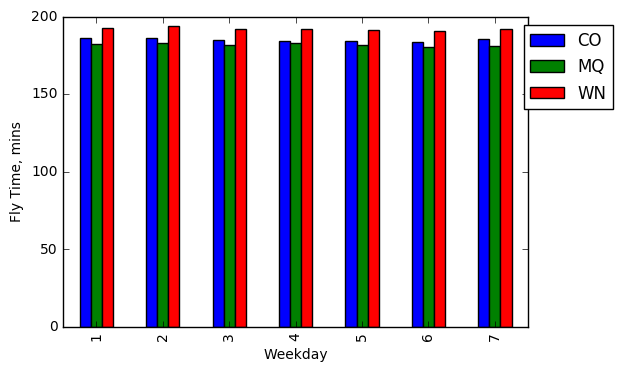

In [38]:
# plot flight time vs. weekday

a = df_pd[['time','carrier','weekday']].groupby(['weekday','carrier']).mean()

CO = pd.DataFrame((a.values[a.index.labels[1]==0]).reshape(1,-1)[0], columns=['CO'], index=range(1,8))
MQ = pd.DataFrame((a.values[a.index.labels[1]==1]).reshape(1,-1)[0], columns=['MQ'], index=range(1,8))
WN = pd.DataFrame((a.values[a.index.labels[1]==2]).reshape(1,-1)[0], columns=['WN'], index=range(1,8))
df_t = pd.concat([CO, MQ, WN], join='outer', axis=1)

fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot(1,1,1)
df_t.plot(kind='bar',ax=ax).legend(bbox_to_anchor=(1.2, 1))
ax.set_xlabel('Weekday')
ax.set_ylabel('Fly Time, mins')

# Remarks: 
# Flight time might not be too senstitive to weekdays.

In [39]:
# find the weekday with lowest flight time

df_pd[['time','flight', 'dep_delay', 'arr_delay','carrier', 'weekday']]\
.groupby(['weekday','flight','carrier']).mean().nsmallest(10,'time')

# Remarks:
# "CO" shows more choices of flight number and less flight time for most weekdays. 
# Thursday and Friday are faster.

time  dep_delay  arr_delay
weekday flight carrier                             
5       1267   CO       162.0       57.0       37.0
4       1599   CO       163.5        3.0      -10.0
5       1203   CO       163.5       10.0       -0.5
4       1599   CO       163.5        3.0      -10.0
5       1203   CO       163.5       10.0       -0.5
1       1203   CO       164.0        2.0       10.0
        1599   CO       164.0       21.0        4.0
3       1863   CO       164.0       43.0       65.0
4       1015   CO       164.0       41.5       23.5
6       1015   CO       164.0        7.0       -9.5
1       1203   CO       164.0        2.0       10.0
        1599   CO       164.0       21.0        4.0
3       1863   CO       164.0       43.0       65.0
4       1015   CO       164.0       41.5       23.5
6       1015   CO       164.0        7.0       -9.5
1       1203   CO       164.0        2.0       10.0
        1599   CO       164.0       21.0        4.0
3       1863   CO       164.0       43.0       65.0
4       1015   CO       164.0       41.5       23.5
6       1015   CO       164.0        7.0       -9.5
1       1203   CO       164.0        2.0       10.0
        1599   CO       164.0       21.0        4.0
3       1863   CO       164.0       43.0       65.0
4       1015   CO       164.0       41.5       23.5
6       1015   CO       164.0        7.0       -9.5
1       1203   CO       164.0        2.0       10.0
        1599   CO       164.0       21.0        4.0
3       1863   CO       164.0       43.0       65.0
4       1015   CO       164.0       41.5       23.5
6       1015   CO       164.0        7.0       -9.5
5       1015   CO       164.5       10.0       -3.0
        1227   CO       164.5       87.5       69.0
6       1533   CO       164.5       14.0        3.5
7       1267   CO       164.5       14.5        4.0
5       1015   CO       164.5       10.0       -3.0
        1227   CO       164.5       87.5       69.0
6       1533   CO       164.5       14.0        3.5
7       1267   CO       164.5       14.5        4.0

In [40]:
# find the weekday with lowest flight time

df_pd[['time','flight', 'dep_delay', 'arr_delay','carrier', 'month']]\
.groupby(['month','flight','carrier']).mean().nsmallest(10,'time')

# Remarks:
# "CO" shows more choices of flight number and less flight time for July and August.

time  dep_delay  arr_delay
month flight carrier                                  
8     1695   CO       159.500000  14.000000  -2.500000
7     1863   CO       164.000000  43.000000  65.000000
8     1533   CO       164.500000  14.000000   3.500000
7     1898   CO       165.000000  53.000000  30.000000
      1548   CO       165.600000  12.400000   2.200000
8     1203   CO       165.909091  29.545455  22.545455
7     3719   MQ       166.064516  18.129032   2.032258
      1460   CO       166.500000  22.000000   8.500000
8     1015   CO       166.769231  18.846154   7.461538
      1267   CO       166.846154  16.461538   8.692308

In [41]:
# find the delayed rate for carriers

aa = df_pd[['carrier','dep_delay','date']].dropna();
aa['delayed'] = (aa.dep_delay.values > 15)*1

a = aa[['carrier', 'delayed','date']].groupby(['carrier','delayed']).count()
print(a)
t = a.date.values[1:6:2]/(a.date.values[0:5:2] + a.date.values[1:6:2]);
print('CO delayed rate:', round(t[0],5),'\nMQ delayed rate:', round(t[1],5), '\nWN delayed rate:',round(t[2],5))

# Remarks: the delayed rates for "CO" and "MQ" are lower than the other one.

                 date
carrier delayed      
CO      0        3013
        1         834
MQ      0         635
        1         161
WN      0         988
        1         401
CO delayed rate: 0.21679 
MQ delayed rate: 0.20226 
WN delayed rate: 0.2887


In [42]:
# find the cancelled rate for carriers

a = df_pd[['carrier', 'cancelled','date']].groupby(['carrier','cancelled']).count()
print(a)
t = a.date.values[1:6:2]/(a.date.values[0:5:2] + a.date.values[1:6:2]);
print('CO cancelled rate:', round(t[0],5),'\nMQ cancelled rate:', round(t[1],5), '\nWN cancelled rate:',round(t[2],5))

# Remarks: "CO" show very low cancelled rate.

                   date
carrier cancelled      
CO      0          3847
        1            11
MQ      0           795
        1            15
WN      0          1389
        1             7
CO cancelled rate: 0.00285 
MQ cancelled rate: 0.01852 
WN cancelled rate: 0.00501


In [43]:
# find all cancelled flight for each carrier

a = df_pd[df_pd['cancelled'] == 1][['carrier','flight','cancelled']]
a.groupby(['carrier','flight']).count()

# Remarks: it is not common to see canceled flights in "CO".

cancelled
carrier flight           
CO      47              1
        52              1
        137             2
        1095            1
        1495            1
        1605            1
        1695            1
        1778            1
        1795            2
MQ      3719            5
        3724            5
        3762            5
WN      113             2
        197             1
        201             1
        1708            2
        2771            1

# Modeling

In [44]:
# Question: how to predict delayed flight accurately?

In [45]:
# drop NA values
df_pd_n = df_pd.dropna();

# split delay time to hours/minutes
df_pd_n = df_pd_n.assign(hour_arr = lambda x: x.arr%10)
df_pd_n = df_pd_n.assign(min_arr = lambda x: (x.arr-x.hour_arr)/100)

# drop unnecessary features
df_pd_n = df_pd_n.drop(['arr','dep','cancelled', 'date'], axis = 1)

# one-hot-encoding categorical features
for f in ['month','weekday','flight', 'day']:
    df_pd_n[f] = df_pd_n[f].astype('category').cat.codes
    
cols = ['carrier', 'flight', 'plane', 'month', 'weekday', 'day']
for f in cols:
    data_dummies = pd.get_dummies(df_pd_n[f], prefix=f)
    df_pd_n = pd.concat((df_pd_n, data_dummies), axis=1)
    df_pd_n = df_pd_n.drop([f], axis=1)

In [46]:
# create labels based on departure/arrival delayed time
df_pd_n['label_delayed'] = ((df_pd_n.dep_delay + df_pd_n.arr_delay)/2 > 15) * 1

df_pd_n = df_pd_n.drop(['dep_delay','arr_delay'], axis=1)

In [47]:
df_pd_n.head(2)

,hour,minute,time,dist,hour_arr,min_arr,carrier_CO,carrier_MQ,carrier_WN,flight_0,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,label_delayed
360,19.0,16.0,199.0,1379,3.0,21.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
361,7.0,47.0,201.0,1379,6.0,9.3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(2016)
Y = df_pd_n['label_delayed']
X = df_pd_n.drop(['label_delayed'], axis = 1)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search

def search_model(x_train, y_train, est, param_grid, n_jobs, cv, refit=False):

    model = grid_search.GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring    = 'f1',
                                     verbose    = 10,
                                     n_jobs  = n_jobs,
                                     iid    = True,
                                     refit    = refit,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    print("Scores:", model.grid_scores_)    
    return model

In [50]:
np.random.seed(2016)
param_grid = {'n_estimators':[11, 21, 41, 101], 'criterion':['gini','entropy']}

RF = search_model(x_train.values
            , y_train.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] criterion=gini, n_estimators=11 .................................
[CV] criterion=gini, n_estimators=11 .................................
[CV] criterion=gini, n_estimators=11 .................................
[CV] criterion=gini, n_estimators=11 .................................
[CV] criterion=gini, n_estimators=11 .................................
[CV] criterion=gini, n_estimators=21 .................................
[CV] criterion=gini, n_estimators=21 .................................
[CV] ........ criterion=gini, n_estimators=11, score=0.460000 -   0.5s
[CV] criterion=gini, n_estimators=21 .................................
[CV] criterion=gini, n_estimators=21 .................................
[CV] ........ criterion=gini, n_estimators=11, score=0.487342 -   0.6s
[CV] criterion=gini, n_estimators=21 .................................
[CV] ........ criterion=gini, n_estimators=11, score=0.392027 -   0.6s
[CV] criterion=gi

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s


[CV] criterion=gini, n_estimators=41 .................................
[CV] ........ criterion=gini, n_estimators=11, score=0.419355 -   0.7s
[CV] criterion=gini, n_estimators=41 .................................
[CV] ........ criterion=gini, n_estimators=21, score=0.438356 -   1.2s
[CV] criterion=gini, n_estimators=41 .................................
[CV] ........ criterion=gini, n_estimators=21, score=0.537975 -   1.2s
[CV] criterion=gini, n_estimators=41 .................................
[CV] ........ criterion=gini, n_estimators=21, score=0.378571 -   1.3s
[CV] criterion=gini, n_estimators=101 ................................
[CV] ........ criterion=gini, n_estimators=21, score=0.364912 -   1.2s
[CV] criterion=gini, n_estimators=101 ................................
[CV] ........ criterion=gini, n_estimators=21, score=0.429530 -   1.3s


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s


[CV] criterion=gini, n_estimators=101 ................................
[CV] ........ criterion=gini, n_estimators=41, score=0.446735 -   2.1s
[CV] ........ criterion=gini, n_estimators=41, score=0.526646 -   2.0s
[CV] criterion=gini, n_estimators=101 ................................
[CV] criterion=gini, n_estimators=101 ................................
[CV] ........ criterion=gini, n_estimators=41, score=0.407143 -   2.1s
[CV] criterion=entropy, n_estimators=11 ..............................
[CV] ........ criterion=gini, n_estimators=41, score=0.397213 -   2.1s
[CV] ........ criterion=gini, n_estimators=41, score=0.416667 -   2.0s
[CV] criterion=entropy, n_estimators=11 ..............................
[CV] criterion=entropy, n_estimators=11 ..............................
[CV] ..... criterion=entropy, n_estimators=11, score=0.448052 -   0.7s
[CV] criterion=entropy, n_estimators=11 ..............................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s


[CV] ..... criterion=entropy, n_estimators=11, score=0.528662 -   0.8s
[CV] criterion=entropy, n_estimators=11 ..............................
[CV] ..... criterion=entropy, n_estimators=11, score=0.419672 -   0.8s
[CV] criterion=entropy, n_estimators=21 ..............................
[CV] ..... criterion=entropy, n_estimators=11, score=0.467290 -   0.7s
[CV] criterion=entropy, n_estimators=21 ..............................
[CV] ..... criterion=entropy, n_estimators=11, score=0.427632 -   0.7s
[CV] criterion=entropy, n_estimators=21 ..............................
[CV] ..... criterion=entropy, n_estimators=21, score=0.423208 -   1.1s
[CV] criterion=entropy, n_estimators=21 ..............................
[CV] ..... criterion=entropy, n_estimators=21, score=0.428571 -   1.1s
[CV] criterion=entropy, n_estimators=21 ..............................
[CV] ..... criterion=entropy, n_estimators=21, score=0.454849 -   1.2s
[CV] criterion=entropy, n_estimators=41 ..............................
[CV] .

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s


[CV] ..... criterion=entropy, n_estimators=21, score=0.465574 -   1.3s
[CV] ..... criterion=entropy, n_estimators=21, score=0.382979 -   1.3s
[CV] criterion=entropy, n_estimators=41 ..............................
[CV] criterion=entropy, n_estimators=101 .............................
[CV] ....... criterion=gini, n_estimators=101, score=0.415225 -   5.0s
[CV] criterion=entropy, n_estimators=101 .............................
[CV] ....... criterion=gini, n_estimators=101, score=0.379562 -   5.1s
[CV] criterion=entropy, n_estimators=101 .............................


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.2s remaining:    2.7s


[CV] ..... criterion=entropy, n_estimators=41, score=0.483221 -   2.0s
[CV] criterion=entropy, n_estimators=101 .............................
[CV] ..... criterion=entropy, n_estimators=41, score=0.483221 -   2.2s
[CV] criterion=entropy, n_estimators=101 .............................
[CV] ..... criterion=entropy, n_estimators=41, score=0.495114 -   2.0s
[CV] ..... criterion=entropy, n_estimators=41, score=0.392857 -   2.0s
[CV] ..... criterion=entropy, n_estimators=41, score=0.388489 -   1.9s


[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.3s remaining:    1.3s


[CV] .... criterion=entropy, n_estimators=101, score=0.464164 -   3.5s
[CV] .... criterion=entropy, n_estimators=101, score=0.518033 -   3.3s
[CV] .... criterion=entropy, n_estimators=101, score=0.410072 -   3.2s
[CV] .... criterion=entropy, n_estimators=101, score=0.426117 -   2.7s
[CV] .... criterion=entropy, n_estimators=101, score=0.385185 -   2.7s
Best score: 0.458
Best parameters set: {'n_estimators': 11, 'criterion': 'entropy'}
Scores: [mean: 0.42179, std: 0.04854, params: {'n_estimators': 11, 'criterion': 'gini'}, mean: 0.42988, std: 0.06101, params: {'n_estimators': 21, 'criterion': 'gini'}, mean: 0.43889, std: 0.04691, params: {'n_estimators': 41, 'criterion': 'gini'}, mean: 0.42136, std: 0.04087, params: {'n_estimators': 101, 'criterion': 'gini'}, mean: 0.45827, std: 0.03891, params: {'n_estimators': 11, 'criterion': 'entropy'}, mean: 0.43104, std: 0.02876, params: {'n_estimators': 21, 'criterion': 'entropy'}, mean: 0.44858, std: 0.04750, params: {'n_estimators': 41, 'criter

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.8s finished


In [51]:
# evaluate the model with the validaiton dataset
from sklearn import metrics

RF = RandomForestClassifier(n_estimators=11, criterion='entropy')
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_val)

print (metrics.classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90       944
          1       0.70      0.35      0.47       260

avg / total       0.81      0.83      0.81      1204



# Conclusions

In [52]:
# The best aireline is Continental Airlines (CO):
# 1) Lowest flight time for most of weekdays, for July and August;
# 2) Large number of flight choices with relatively low cancelllation rate and delay rate
# 3) A binary RandomForestClassifier is trained and validated to predict flight delay.